In [1]:
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings

'''missing data interpolation'''
from scipy.interpolate import CubicSpline

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
''' reading data '''
df = pd.read_csv('energy_dataset.csv')

In [3]:
''' displaying first five rows '''
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
''' shape of data '''
df.shape

(35064, 29)

In [5]:
''' checking null values '''
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(column, df[column].isnull().sum())

generation biomass 19
generation fossil brown coal/lignite 18
generation fossil coal-derived gas 18
generation fossil gas 18
generation fossil hard coal 18
generation fossil oil 19
generation fossil oil shale 18
generation fossil peat 18
generation geothermal 18
generation hydro pumped storage aggregated 35064
generation hydro pumped storage consumption 19
generation hydro run-of-river and poundage 19
generation hydro water reservoir 18
generation marine 19
generation nuclear 17
generation other 18
generation other renewable 18
generation solar 18
generation waste 19
generation wind offshore 18
generation wind onshore 18
forecast wind offshore eday ahead 35064
total load actual 36


In [6]:
'''info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
''' dropping columns '''
df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'total load forecast', 
         'forecast solar day ahead','forecast wind onshore day ahead', 'price day ahead'], axis=1, inplace=True)

In [8]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,total load actual,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,25385.0,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,24382.0,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,22734.0,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,21286.0,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,20264.0,56.04


In [9]:
df.shape

(35064, 23)

In [10]:
''' rename columns '''
df.rename(columns=lambda x: x[11:] if 'generation' in x else x, inplace=True)
df.rename(columns={'total load actual':'energy demand'}, inplace=True)

In [11]:
df.head()

,time,biomass,fossil brown coal/lignite,fossil coal-derived gas,fossil gas,fossil hard coal,fossil oil,fossil oil shale,fossil peat,geothermal,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,marine,nuclear,other,other renewable,solar,waste,wind offshore,wind onshore,energy demand,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,25385.0,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,24382.0,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,22734.0,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,21286.0,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,20264.0,56.04


In [12]:
''' Create different time granularity '''

''' converting time into date time '''
df['time'] = pd.to_datetime(df['time'], utc=True)

''' creating new column '''
df['Year-Month'] = pd.to_datetime(df['time'].dt.strftime('%Y-%m-01')).dt.date

In [13]:
''' Missing value analysis '''

' Missing value analysis '

In [14]:
df[df.isna().any(axis=1)]

,time,biomass,fossil brown coal/lignite,fossil coal-derived gas,fossil gas,fossil hard coal,fossil oil,fossil oil shale,fossil peat,geothermal,hydro pumped storage consumption,hydro run-of-river and poundage,hydro water reservoir,marine,nuclear,other,other renewable,solar,waste,wind offshore,wind onshore,energy demand,price actual,Year-Month
99,2015-01-05 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21182.0,59.68,2015-01-01
108,2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.14,2015-01-01
109,2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.95,2015-01-01
110,2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.93,2015-01-01
111,2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.50,2015-01-01
112,2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.85,2015-01-01
113,2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.53,2015-01-01
451,2015-01-19 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39304.0,88.95,2015-01-01
452,2015-01-19 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39262.0,87.94,2015-01-01
643,2015-01-27 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38335.0,83.97,2015-01-01


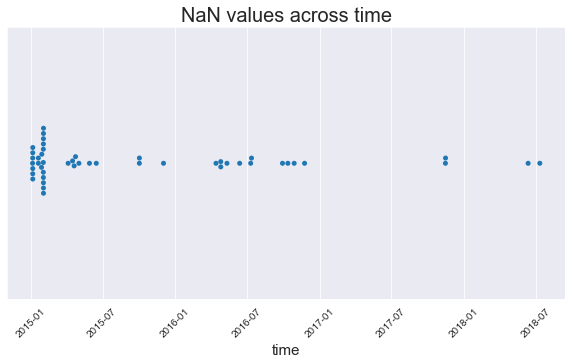

In [15]:
''' swarm plot '''
plt.figure(figsize=(10, 5))
sns.swarmplot(x='time', data=df[df.isna().any(axis=1)])
plt.xticks(rotation=45)
plt.xlabel('time', fontsize=15)
plt.title('NaN values across time', fontsize=20);

In [16]:
''' groupby '''
df[df.isna().any(axis=1)].groupby('Year-Month')['time'].count()

Year-Month
2015-01-01    11
2015-02-01    11
2015-04-01     4
2015-05-01     2
2015-06-01     1
2015-10-01     2
2015-12-01     1
2016-04-01     3
2016-05-01     1
2016-06-01     1
2016-07-01     2
2016-09-01     1
2016-10-01     2
2016-11-01     1
2017-11-01     2
2018-06-01     1
2018-07-01     1
Name: time, dtype: int64

In [17]:
''' Consolidate different energy sources '''

fossil_fuel = ['fossil brown coal/lignite', 'fossil gas', 'fossil hard coal', 'fossil oil']
hydro = ['hydro pumped storage consumption', 'hydro run-of-river and poundage', 'hydro water reservoir']
wind = ['wind onshore']
others = ['other', 'other renewable'] 
df['fossil_fuel'] = df.loc[:, fossil_fuel].sum(axis=1)
df['hydro'] = df.loc[:, hydro].sum(axis=1)
df['wind'] = df.loc[:, wind].sum(axis=1)
df['others'] = df.loc[:, others].sum(axis=1)

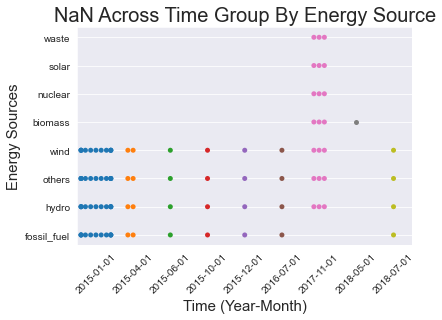

In [18]:
energy_ls = ['biomass','fossil_fuel','hydro','wind','solar','nuclear','waste','others']
energy_f = pd.melt(df, id_vars='Year-Month', value_vars=energy_ls)
df_ = energy_f.loc[energy_f.value == 0]
df_.sort_values(by='Year-Month', inplace=True)

''' swarm plot '''
sns.swarmplot(x='Year-Month', y='variable', data=df_)
plt.title('NaN Across Time Group By Energy Source', fontsize=20)
plt.ylabel('Energy Sources', fontsize=15)
plt.xlabel('Time (Year-Month)', fontsize=15)
plt.xticks(rotation=45);

In [19]:
df[energy_ls] = df[energy_ls].replace(['0', 0], np.nan)

In [20]:
''' interpolation '''
def inter_pol(col_limit, energy):
    for column in col_limit:
        index_list = df[df[column].isna()].index
        for index in index_list:
            lb = index - 10
            up = index + 10
            if ((df.iloc[lb:up][column].isna()).sum() > 1):
                temp = df.iloc[lb:up][column]
                indices = temp[temp.isna()].index
                temp = temp.interpolate(method='quadratic', order=4)
                for index in indices:
                    energy.loc[index, column] = temp.loc[index]
            else:
                lb = index - 2
                up = index + 2
                temp = df.iloc[lb: up][column]
                temp = temp[~temp.isna()]
                X = temp.index.values
                y = temp.values
                cs = CubicSpline(X , y)
                df.loc[index, column] = cs(index).item(0)

In [21]:
inter_pol(energy_ls, df)

In [22]:
df.loc[:,energy_ls].isna().sum() + df.loc[:,energy_ls][df.loc[:,energy_ls] == 0].sum()

biomass        0.0
fossil_fuel    0.0
hydro          0.0
wind           0.0
solar          0.0
nuclear        0.0
waste          0.0
others         0.0
dtype: float64